# Stock Prediction w/scikit learn

#### https://enlight.nyc/projects/stock-market-prediction

In [1]:
!pip install skl2onnx -q

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# import quandl

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [3]:
# df = pd.read_csv('data/MUFG-orig.csv')
df = pd.read_csv('../data/MUFG-orig.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-16,5.80,5.83,5.73,5.79,5.79,2970200
1,2022-05-17,5.58,5.65,5.58,5.61,5.61,3033900
2,2022-05-18,5.63,5.63,5.55,5.59,5.59,4419200
3,2022-05-19,5.57,5.61,5.56,5.59,5.59,3823000
4,2022-05-20,5.64,5.68,5.58,5.66,5.66,4595800


In [5]:
df = df[['Adj Close']]

In [6]:
forecast_out = int(30) # predicting 30 days into future
df['Prediction'] = df[['Adj Close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [8]:
X = np.array(df.drop(['Prediction'], axis=1))
X_raw = X
X = preprocessing.scale(X)

### Set a new input variable to these days and remove them from the X array.

In [9]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

### To define our y, or output, we will set it equal to our array of the Prediction values and remove the last 30 days where we don’t have any pricing data.

In [10]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

## Linear regression model

### Split the data into training and test sets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.34169556872869944


In [13]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([1]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open("stocks.onnx", "wb") as f:
    f.write(onx.SerializeToString())

/Users/bkozdemb/venv-tmp/lib/python3.9/site-packages/skl2onnx/algebra/onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
/Users/bkozdemb/venv-tmp/lib/python3.9/site-packages/skl2onnx/algebra/automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
/Users/bkozdemb/venv-tmp/lib/python3.9/site-packages/jinja2/environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


In [14]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[6.28173234 6.26382957 6.2518944  6.2518944  6.23995922 6.28173234
 6.2518944  6.26979716 6.29963511 6.34737581 6.34737581 6.41301929
 6.32947305 6.26979716 6.23399163 6.16238057 6.18028333 6.28769993
 6.16834815 6.17431574 6.07286674 6.04302879 6.00722326 6.17431574
 6.18625092 6.23399163 6.21608886 6.25786198 6.24592681 6.45777621]


In [15]:
X_forecast_raw = X_raw[-forecast_out:]
X_raw = X_raw[:-forecast_out]

array([[5.79],
       [5.61],
       [5.59],
       [5.59],
       [5.66],
       [5.82],
       [5.84],
       [5.85],
       [5.92],
       [5.9 ],
       [5.67],
       [5.72],
       [5.75],
       [5.67],
       [5.68],
       [5.7 ],
       [5.54],
       [5.48],
       [5.42],
       [5.44],
       [5.46],
       [5.54],
       [5.59],
       [5.39],
       [5.58],
       [5.52],
       [5.48],
       [5.54],
       [5.47],
       [5.46],
       [5.42],
       [5.34],
       [5.43],
       [5.39],
       [5.25],
       [5.33],
       [5.4 ],
       [5.4 ],
       [5.38],
       [5.35],
       [5.13],
       [5.15],
       [5.17],
       [5.29],
       [5.26],
       [5.28],
       [5.32],
       [5.41],
       [5.4 ],
       [5.51],
       [5.51],
       [5.67],
       [5.67],
       [5.51],
       [5.43],
       [5.26],
       [5.29],
       [5.31],
       [5.23],
       [5.37],
       [5.39],
       [5.45],
       [5.42],
       [5.4 ],
       [5.4 ],
       [5.39],
       [5.

In [16]:
clf.predict(X_forecast)

array([6.28173234, 6.26382957, 6.2518944 , 6.2518944 , 6.23995922,
       6.28173234, 6.2518944 , 6.26979716, 6.29963511, 6.34737581,
       6.34737581, 6.41301929, 6.32947305, 6.26979716, 6.23399163,
       6.16238057, 6.18028333, 6.28769993, 6.16834815, 6.17431574,
       6.07286674, 6.04302879, 6.00722326, 6.17431574, 6.18625092,
       6.23399163, 6.21608886, 6.25786198, 6.24592681, 6.45777621])

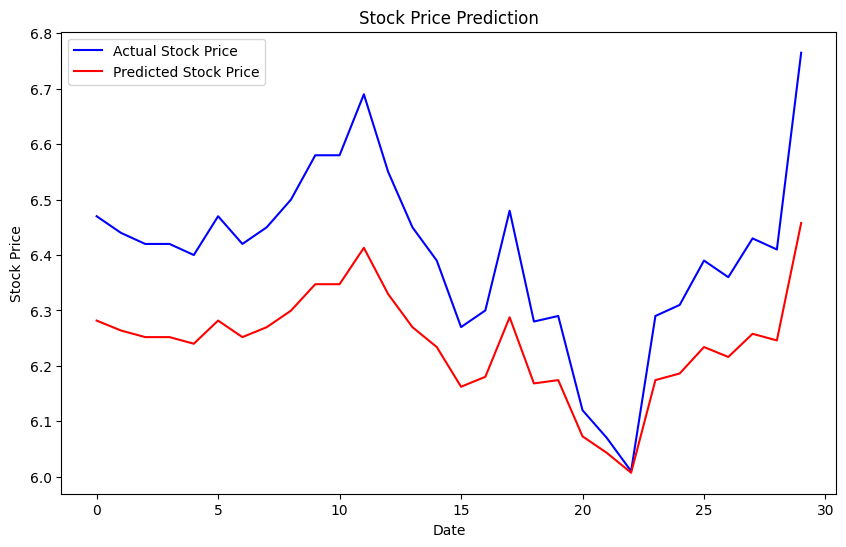

In [17]:
plt.figure(figsize=(10,6))  
plt.plot(X_forecast_raw, color='blue', label='Actual Stock Price')  
plt.plot(forecast_prediction , color='red', label='Predicted Stock Price')  
plt.title('Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Stock Price')  
plt.legend()  
plt.show()  